In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio

/kaggle/input/amazon-cell-phones-reviews/20191226-items.csv
/kaggle/input/amazon-cell-phones-reviews/20191226-reviews.csv


In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
df =pd.read_csv("/kaggle/input/amazon-cell-phones-reviews/20191226-reviews.csv")
df

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [4]:
df['id']=df.index
df

,asin,name,rating,date,verified,title,body,helpfulVotes,id
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,1
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,2
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,3
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,4
...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,67981
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,67982
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,67983
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,67984


**Due to low computional power ,taking only 2000 rows as for for sentimental analysis**

In [5]:
df = df.head(2000)

In [6]:
df.shape

(2000, 9)

<Axes: xlabel='rating', ylabel='count'>

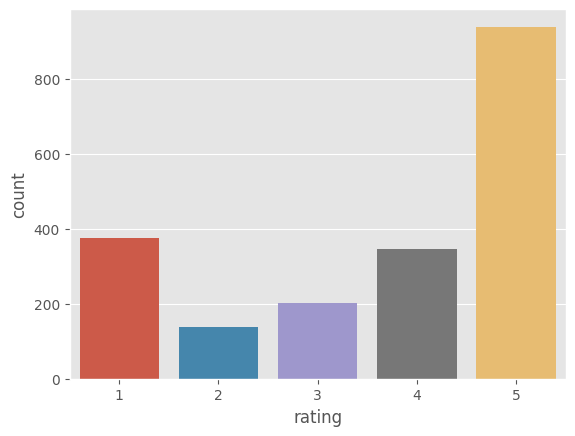

In [7]:
sns.countplot(data = df , x='rating')

<Axes: xlabel='verified', ylabel='count'>

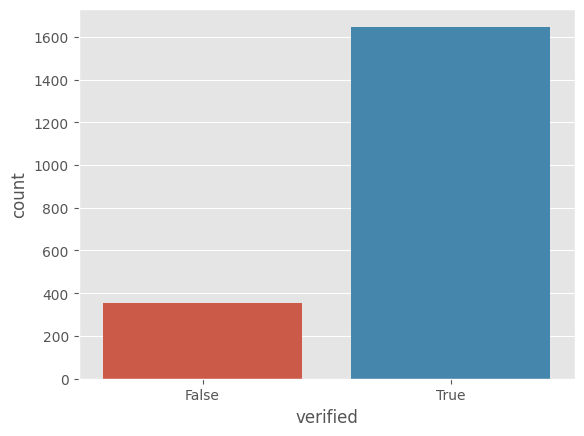

In [8]:
sns.countplot(data=df , x='verified')

In [9]:
df1 = df['body'][50]
df1

'This is not a "boost" phone and will not work as a GPS with Boost. Had to send it back. A huge pain for something that is $24. This is a rip-off.'

In [10]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import tensorflow as tf

2024-03-27 08:22:33.890000: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 08:22:33.890139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 08:22:34.066113: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly 

In [12]:
import torch

In [13]:
df['body'][50]

'This is not a "boost" phone and will not work as a GPS with Boost. Had to send it back. A huge pain for something that is $24. This is a rip-off.'

In [14]:
text = "I use hugging face , becouse it gets error every time and i love getting error!"
encoded_text = tokenizer(text, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.2865995, 'roberta_neu': 0.26771405, 'roberta_pos': 0.44568646}


In [15]:
from tqdm.notebook import tqdm

In [16]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

**Using a try and catch block for those reviews which have some special charater or something that can give error**

In [17]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['body']
        myid = row['id']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/2000 [00:00<?, ?it/s]

Broke for id 19
Broke for id 40
Broke for id 82
Broke for id 84
Broke for id 100
Broke for id 145
Broke for id 620
Broke for id 666
Broke for id 667
Broke for id 828
Broke for id 867
Broke for id 984
Broke for id 1027
Broke for id 1028
Broke for id 1172
Broke for id 1175
Broke for id 1178
Broke for id 1343
Broke for id 1345
Broke for id 1350
Broke for id 1366
Broke for id 1399
Broke for id 1430
Broke for id 1501
Broke for id 1529
Broke for id 1577
Broke for id 1578
Broke for id 1730
Broke for id 1970
Broke for id 1971


In [18]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')
results_df


,id,roberta_neg,roberta_neu,roberta_pos,asin,name,rating,date,verified,title,body,helpfulVotes
0,0,0.889011,0.096533,0.014456,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,1,0.666823,0.307387,0.025790,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,2,0.049742,0.157302,0.792956,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,3,0.064776,0.147354,0.787870,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,4,0.142097,0.189636,0.668267,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1965,1995,0.537915,0.197252,0.264833,B00727AODC,kuicho,3,"June 2, 2013",True,Good but could be better,"It is a good phone, and works good most of the...",1.0
1966,1996,0.660398,0.269246,0.070356,B00727AODC,HisGlory Majidah,3,"December 31, 2013",True,couldnt get or receive pic msgs,I was disappointed. Surprised my husband n Bou...,NaN
1967,1997,0.019471,0.626327,0.354202,B00727AODC,Delbert,5,"June 13, 2012",True,Un Gran Windows Phone 7 rápido y compacto,Use en su momento el Omnia 7 un teléfono del 2...,2.0
1968,1998,0.005479,0.027734,0.966787,B00727AODC,wilma wan,4,"December 28, 2013",True,nice phone,This was a perfect Christmas present. I bought...,NaN


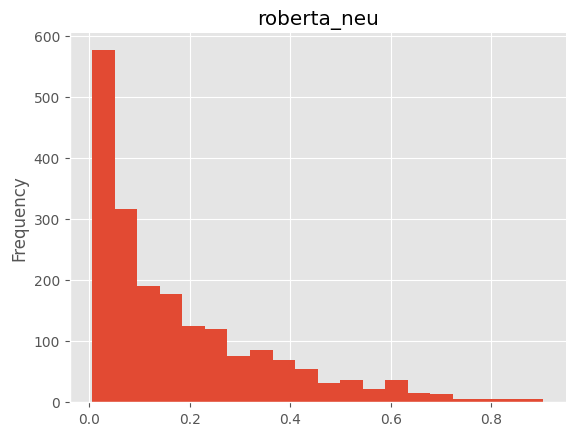

In [19]:
results_df['roberta_neu'].plot(kind='hist', bins=20, title='roberta_neu')
plt.gca().spines[['top', 'right',]].set_visible(False)

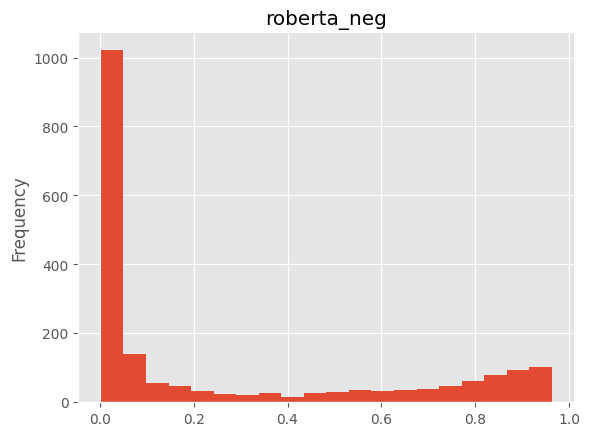

In [20]:
results_df['roberta_neg'].plot(kind='hist', bins=20, title='roberta_neg')
plt.gca().spines[['top', 'right',]].set_visible(False)

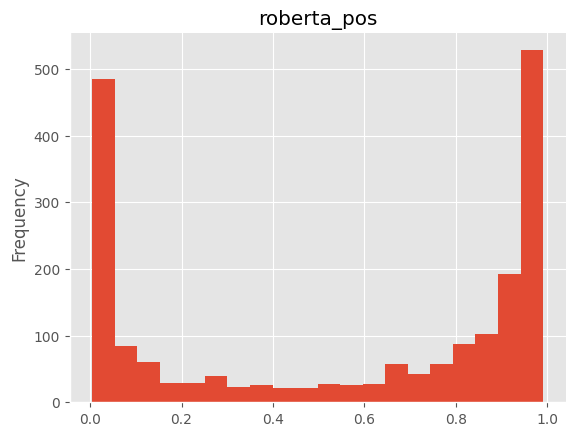

In [21]:
results_df['roberta_pos'].plot(kind='hist', bins=20, title='roberta_pos')
plt.gca().spines[['top', 'right',]].set_visible(False)

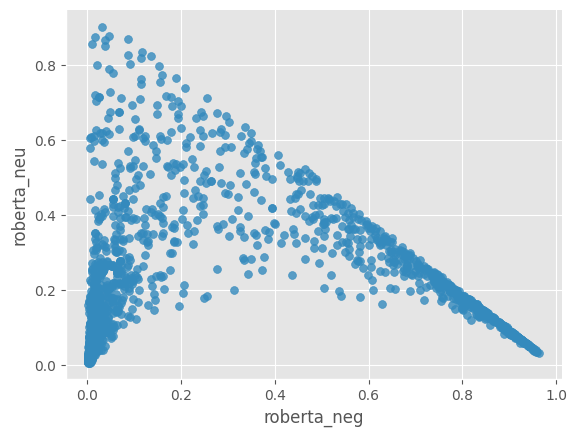

In [22]:
results_df.plot(kind='scatter', x='roberta_neg', y='roberta_neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

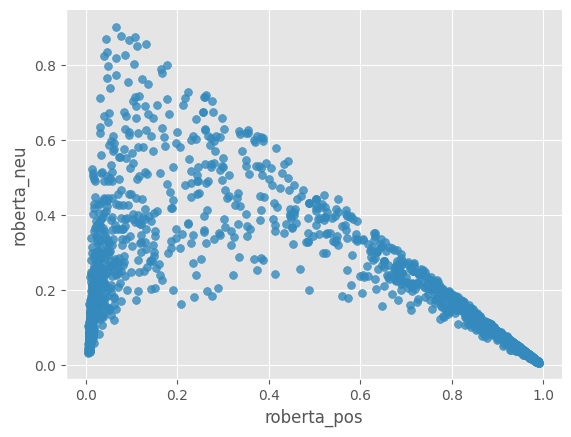

In [23]:
results_df.plot(kind='scatter', x='roberta_pos', y='roberta_neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

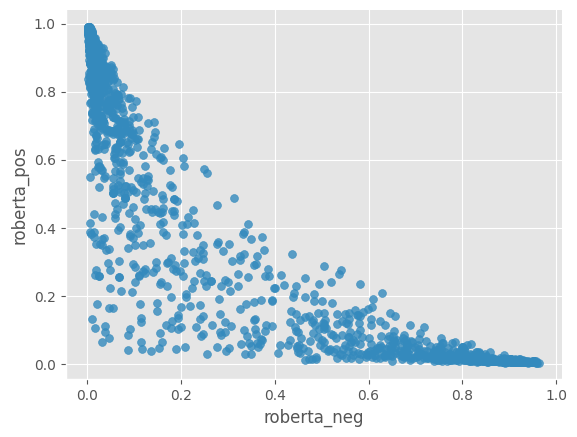

In [24]:
results_df.plot(kind='scatter', x='roberta_neg', y='roberta_pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
results_df.to_csv('Sentimental_df.csv', index=True)